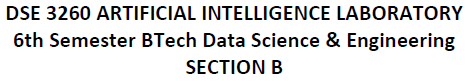

## Kartabya Krishna
## RegNo: 210968244
## Week: 2.2
## Date: 20240114

# ----------------------------------------------------------------------------------------------

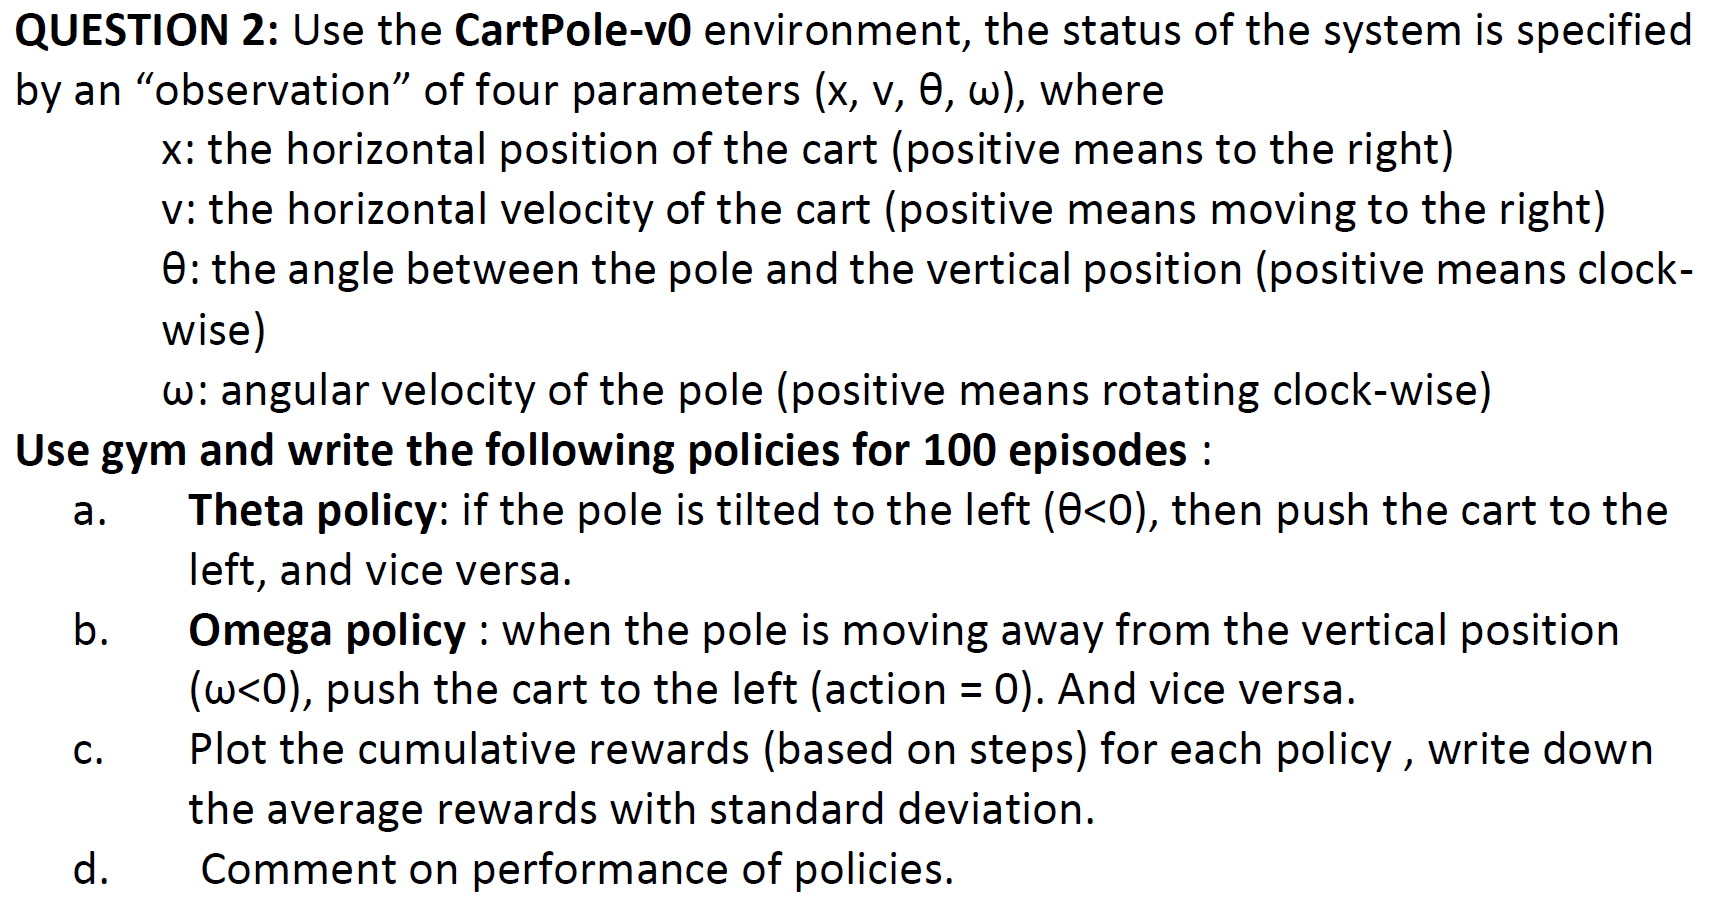

# _Introduction_
### In this notebook, we implement and analyze two policies for the CartPole-v0 environment using OpenAI Gym. The system is characterized by a four-parameter observation: 
### x (horizontal position of the cart), 
### v (horizontal velocity of the cart), 
### theta (angle between the pole and the vertical position), and 
### omega (angular velocity of the pole).

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Importing Necessary libraries

In [37]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# _Theta Policy_

### The Theta policy is designed to move the cart left or right based on the tilt of the pole. If the pole is tilted to the left (theta < 0), the policy will choose to move the cart left; otherwise, it will move the cart right.


In [38]:
def theta_policy(observation):
    if isinstance(observation, tuple):
        observation = observation[0]
    theta = observation[2]
    if theta < 0:
        return 0  # move cart left
    else:
        return 1  # move cart right

# _Omega Policy_

### The Omega policy is designed to move the cart left or right based on the angular velocity of the pole (omega). If omega < 0, indicating that the pole is moving away from the vertical position, the policy will choose to move the cart left; otherwise, it will move the cart right.

In [39]:
def omega_policy(observation):
    if isinstance(observation, tuple):
        observation = observation[0]
    omega = observation[3]
    if omega < 0:
        return 0  # move cart left
    else:
        return 1  # move cart right

### ------------------------------------------------------------------------------------------------------------------------------------------------------

In [40]:
def run_episodes(policy, episodes):
    env = gym.make('CartPole-v0')
    rewards = []

    for _ in range(episodes):
        observation = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = policy(observation)
            step_result = env.step(action)
            next_observation = step_result[0]
            reward = step_result[1]
            done = step_result[2]

            total_reward += reward
            observation = next_observation

        rewards.append(total_reward)

    env.close()
    return rewards 

## `run_episodes` Function Explanation

The `run_episodes` function serves as a utility to execute multiple episodes within the CartPole-v0 environment using OpenAI Gym. This function takes a policy function and the number of episodes as input parameters.

1. **Environment Initialization:**
   - Inside the function, a CartPole environment ('CartPole-v0') is created using OpenAI Gym.

2. **Reward Storage:**
   - The function initializes an empty list (`rewards`) to store the cumulative rewards for each episode.

3. **Episode Execution Loop:**
   - The function runs a loop for the specified number of episodes.

4. **Initialization for Each Episode:**
   - For each episode, the environment is reset to its initial state.
   - The total reward for the episode is set to zero.

5. **Episode Iteration Loop:**
   - A loop is executed until the episode is marked as done (`done = True`).

6. **Policy-Based Action Selection:**
   - In each iteration of the inner loop, the policy function is used to determine the action to take based on the current observation.

7. **Environment Interaction:**
   - The chosen action is applied to the environment using the `env.step(action)` function.
   - The resulting tuple is unpacked to obtain the next observation, reward, and done flag.

8. **Cumulative Reward Update:**
   - The total reward for the episode is updated based on the obtained reward.

9. **Observation Update:**
   - The current observation is updated for the next iteration.

10. **Cumulative Reward Storage:**
    - The cumulative reward for the episode is stored in the `rewards` list.

11. **Environment Closure:**
    - Once all episodes are completed, the CartPole environment is closed.

12. **Return Values:**
    - Finally, the function returns the list of cumulative rewards for all episodes.

This `run_episodes` function is a versatile utility that facilitates the execution of episodes with a specified policy and captures cumulative rewards for subsequent analysis.


In [41]:

# Run episodes with theta policy
theta_rewards = run_episodes(theta_policy, episodes=100)

# Run episodes with omega policy
omega_rewards = run_episodes(omega_policy, episodes=100)


# Plotting Results

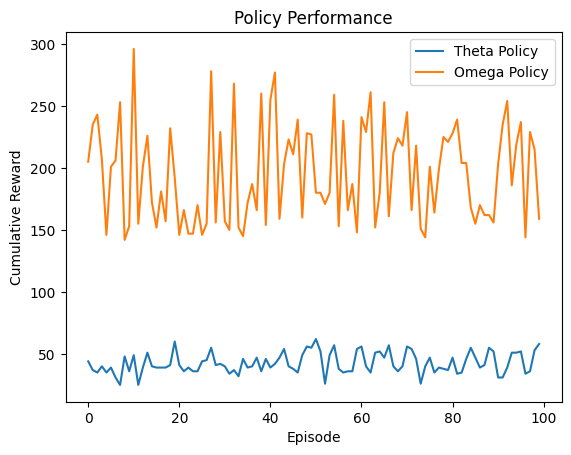

In [42]:
# Plot cumulative rewards
plt.plot(theta_rewards, label='Theta Policy')
plt.plot(omega_rewards, label='Omega Policy')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Policy Performance')
plt.show()


# Performance Analysis

In [43]:
# Display average rewards and standard deviation
print("Theta Policy - Average Reward:", np.mean(theta_rewards))
print("Theta Policy - Reward Standard Deviation:", np.std(theta_rewards))

print("Omega Policy - Average Reward:", np.mean(omega_rewards))
print("Omega Policy - Reward Standard Deviation:", np.std(omega_rewards))


Theta Policy - Average Reward: 42.63
Theta Policy - Reward Standard Deviation: 8.378132250090111
Omega Policy - Average Reward: 195.44
Omega Policy - Reward Standard Deviation: 39.38967377371892
